In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import pickle
%matplotlib notebook

from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA
from plsa.preprocessors import tokenize

prop = FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.family'] = prop.get_name()
plt.rcParams['font.size'] = 28.
plt.rcParams['axes.labelsize'] = 24.
plt.rcParams['xtick.labelsize'] = 24.
plt.rcParams['ytick.labelsize'] = 24.
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['axes.linewidth'] = 1.0

<IPython.core.display.Javascript object>


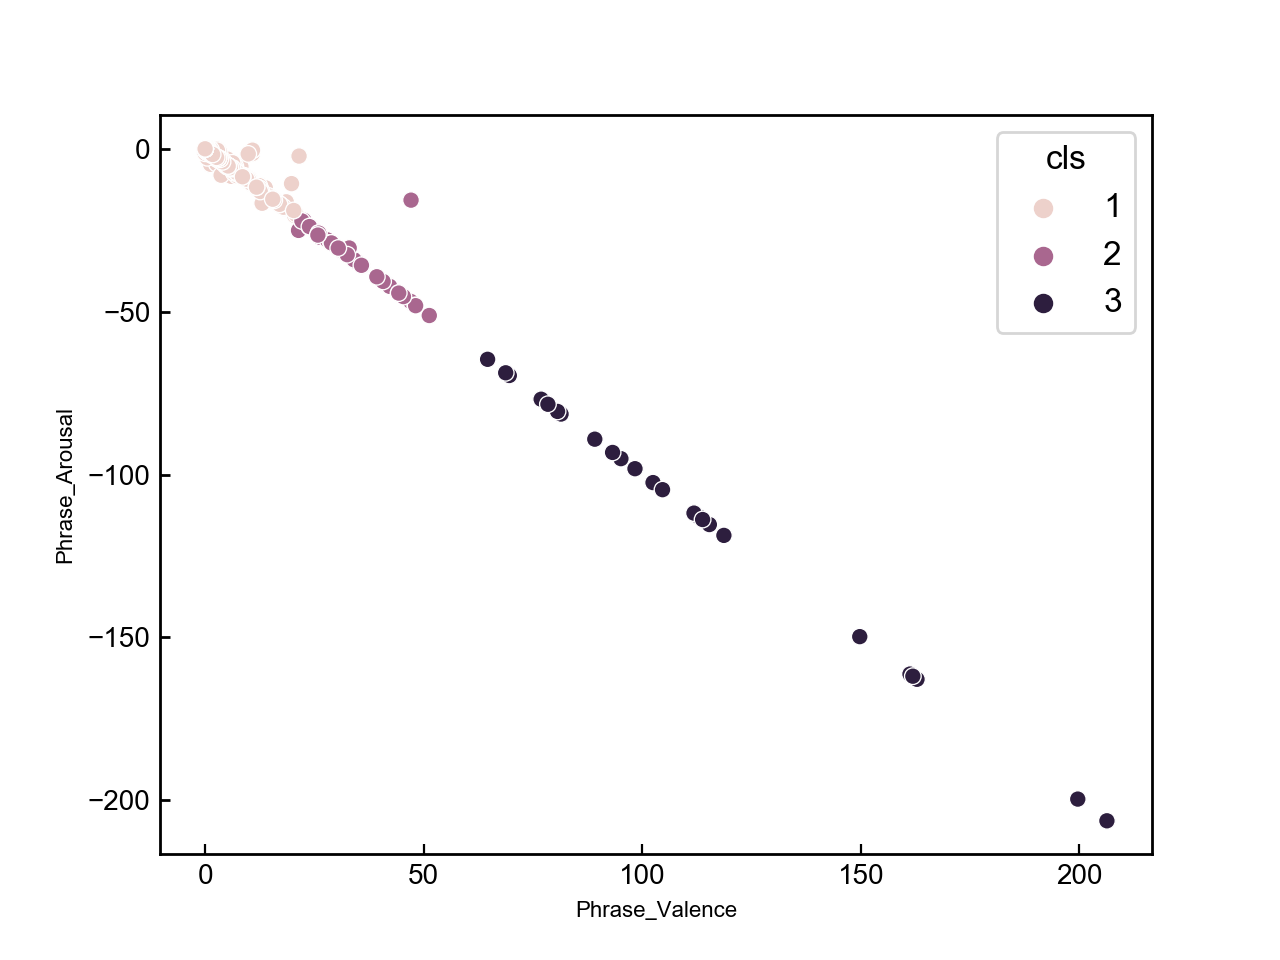

In [19]:
# _df = pd.read_csv("../data/my/research.csv")
# _df = _df.query('0 > Lyrics_Arousal & 0 < Lyrics_Valence')
# linked = linkage(np.array(list(_df["distance"])).reshape(-1,1), method='ward', metric='euclidean')
# label = fcluster(linked, t=3, criterion="maxclust")
# label
# plt.scatter(_df["Lyrics_Valence"],_df["Lyrics_Arousal"],s=1)

# _df["cls"] = label
# _df=pd.read_csv("../data/my/four_word_AV.csv")
# cls_list = list(_df["cls"])
# for i in range(len(cls_list)):
#     if cls_list[i] == 2:
#         cls_list[i] = 2
#     elif cls_list[i] == 3:
#         cls_list[i] = 1
#     else:
#         cls_list[i] = 3

# _df["cls"] = cls_list
# _df.to_csv("../data/my/four_phrase_AV.csv")
# import seaborn as sns
# figure = sns.scatterplot(x='Phrase_Valence', y='Phrase_Arousal', hue='cls', data=_df)
# figure = figure.get_figure()
# figure.savefig("../data/four_phrase_AV")

In [2]:
# csv_file = '../data/my/four_word_AV.csv'
# df = pd.read_csv(csv_file)
# a_df = df[df['cls'] == 1]
# b_df = df[df['cls'] == 2]
# c_df = df[df['cls'] == 3]
# color_dict = {"#7700ff":a_df,"#dc42ff":b_df,"#ffe6e6":c_df}

In [3]:
# plt.title("Plot phrase on A-V+")
# plt.xlabel("Valence")
# plt.ylabel("Arousal")
# for color,_df in color_dict.items():
#     plt.scatter(_df["v"],_df["a"],s=30,c=color,linewidths=0.5,edgecolors="white")

In [20]:
csv_file = '../data/円グラフ.csv'
df = pd.read_csv(csv_file)
df.head(1)

,タイムスタンプ,あなたの性別は?,ポジティブ or ネガティブ?,興奮 or 弛緩?,喜怒哀楽どれか一つのグループに分けるとしたらどのグループ?,ポジティブ or ネガティブ?.1,興奮 or 弛緩?.1,喜怒哀楽どれか一つのグループに分けるとしたらどのグループ?.1,ポジティブ or ネガティブ?.2,興奮 or 弛緩?.2,...,楽曲のMV(ミュージックビデオ)は既知ですか.9,ポジティブ or ネガティブ?.22,興奮 or 弛緩?.22,喜怒哀楽どれか一つのグループに分けるとしたらどのグループ?.22,この楽曲は既知ですか?.11,楽曲の歌手は既知ですか?.11,楽曲のMV(ミュージックビデオ)は既知ですか.10,ポジティブ or ネガティブ?.23,興奮 or 弛緩?.23,喜怒哀楽どれか一つのグループに分けるとしたらどのグループ?.23
0,2021/12/14 12:07:47,女,ポジティブに感じる,興奮を感じる,"喜(ワクワク, 喜び, 至福)",どちらかというとネガティブに感じる,弛緩を感じる,"哀(失望 ,憂鬱, 退屈)",ポジティブに感じる,興奮を感じる,...,No,ポジティブに感じる,興奮を感じる,"喜(ワクワク, 喜び, 至福)",No,yes,No,ネガティブに感じる,どちらとも言えない・わからない,"怒(激怒 ,イライラ, 嫌悪, 暴力的)"


In [21]:
index_a = ["ポジティブに感じる", "どちらかというとポジティブに感じる", "どちらとも言えない・わからない","どちらかというとネガティブに感じる","ネガティブに感じる"]
index_b = ["興奮を感じる", "どちらかというと興奮を感じる", "どちらとも言えない・わからない","どちらかというと弛緩を感じる","弛緩を感じる"]
index_c = ["喜(ワクワク, 喜び, 至福)","怒(激怒 ,イライラ, 嫌悪, 暴力的)","哀(失望 ,憂鬱, 退屈)","楽(変化を望まない,穏やか,ゆったりとした)","わからない"]

In [73]:
d = {}
for i in index_c:
    _df = df[df['喜怒哀楽どれか一つのグループに分けるとしたらどのグループ?.23'].isin([f'{i}'])]['喜怒哀楽どれか一つのグループに分けるとしたらどのグループ?']
    d[f"{i}"] = len(_df)
print(d)
for k,v in d.items():   # 一度pd.Seriesに変換
    d[k]=pd.Series(v)

_df=pd.DataFrame(d)
_df

{'喜(ワクワク, 喜び, 至福)': 2, '怒(激怒 ,イライラ, 嫌悪, 暴力的)': 4, '哀(失望 ,憂鬱, 退屈)': 1, '楽(変化を望まない,穏やか,ゆったりとした)': 3, 'わからない': 1}


,"喜(ワクワク, 喜び, 至福)","怒(激怒 ,イライラ, 嫌悪, 暴力的)","哀(失望 ,憂鬱, 退屈)","楽(変化を望まない,穏やか,ゆったりとした)",わからない
0,2,4,1,3,1


<IPython.core.display.Javascript object>


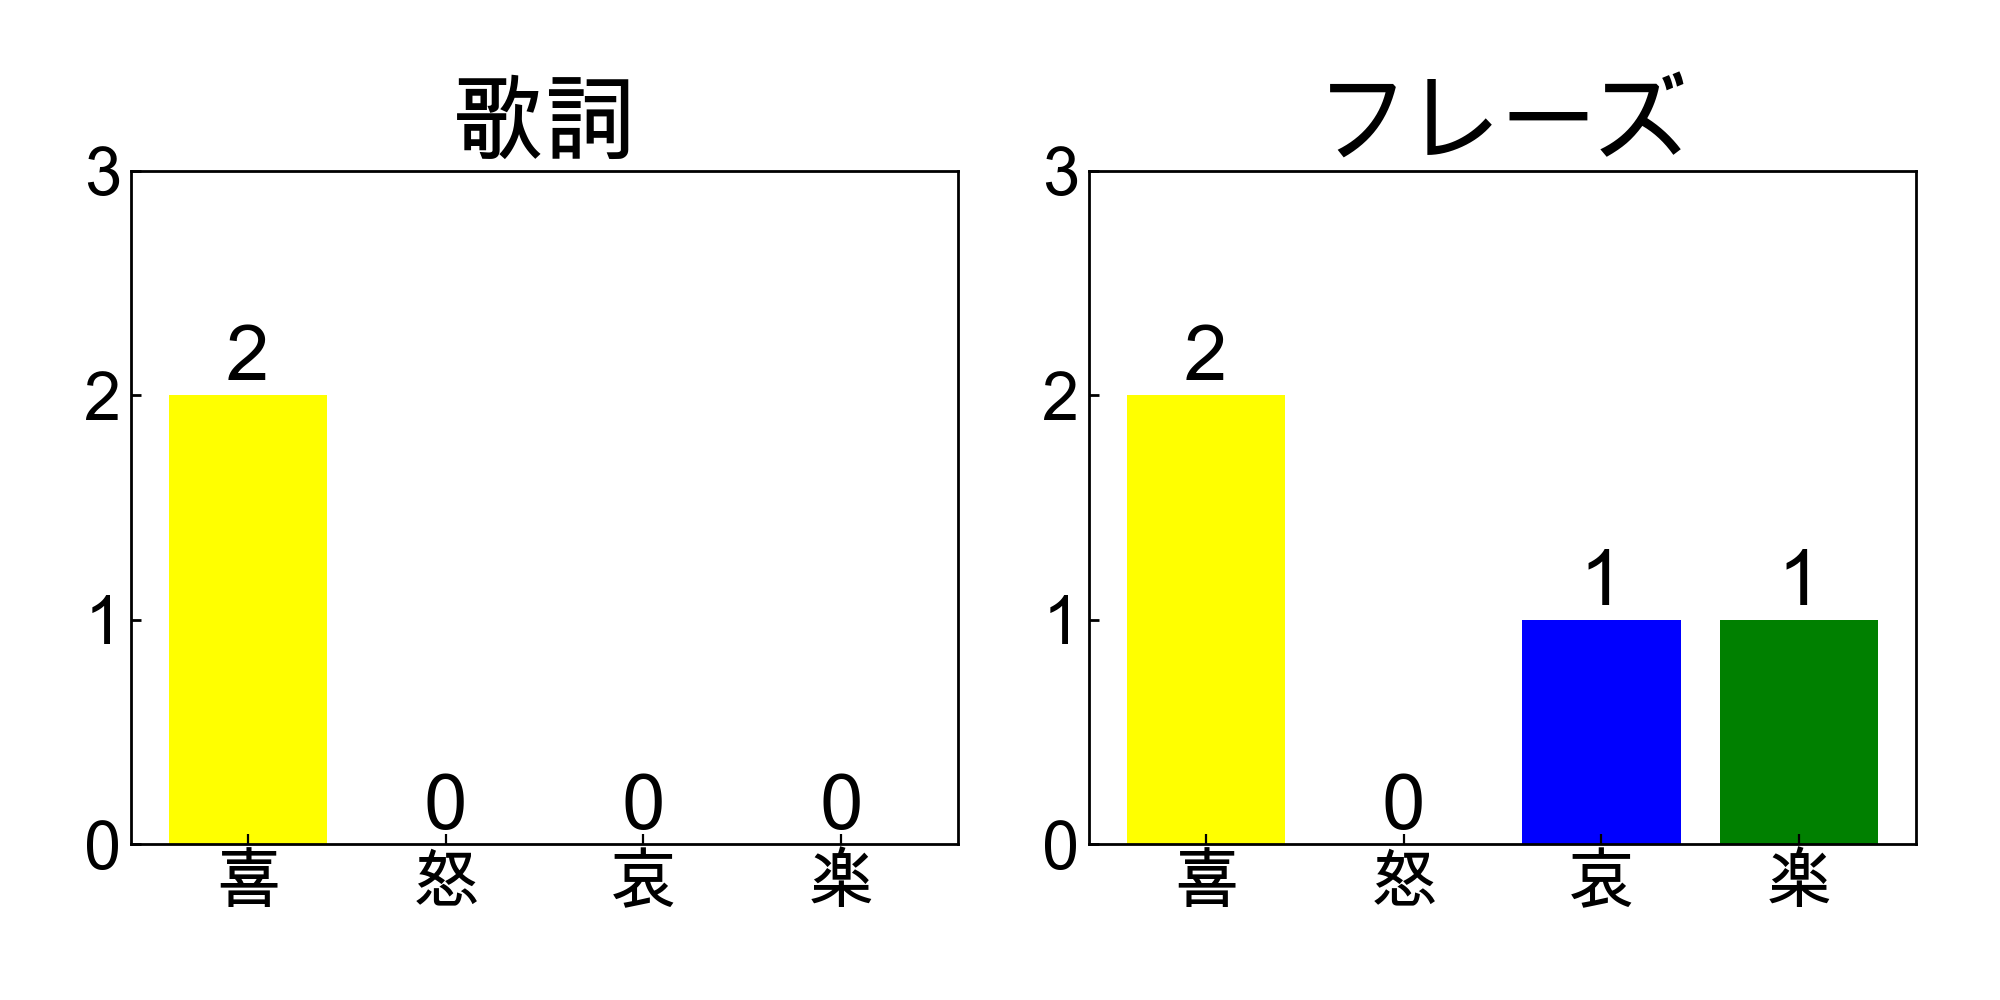

In [5]:
column =["喜","怒","哀","楽"]
lyrics_val = [2,0,0,0]
phrase_val = [2,0,1,1]
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.bar(column,lyrics_val,color=["yellow","red","blue","green"])
for x, y in zip(column, lyrics_val):
    ax1.text(x, y, y, ha='center', va='bottom')
ax1.axes.set_xticks(column, minor=False)
ax1.axes.set_yticks([0,1,2,3], minor=False)
ax1.set_title('歌詞')

ax2.bar(column,phrase_val,color=["yellow","red","blue","green"])
for x, y in zip(column, phrase_val):
    ax2.text(x, y, y, ha='center', va='bottom')
ax2.axes.set_xticks(column, minor=False)
ax2.axes.set_yticks([0,1,2,3], minor=False)
ax2.set_title('フレーズ')

plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))
plt.gca().yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

fig.tight_layout()
fig.show()

plt.savefig("result.png")